# Определение перспективного тарифа для телеком компании
## Описание проекта
Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна» за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    

## Итоги проекта
Проведен предварительный анализ использования тарифов на выборке клиентов, проанализировано поведение клиентов при использовании услуг оператора и рекомендованы оптимальные наборы услуг для пользователей. Проведена предобработка данных, их анализ. Проверены гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st
import random


# Изучение общей информации

## Информация о звонках

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [6]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

## Информация об интернет-сессиях

In [7]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [10]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

## Информация о сообщениях

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

## Информация о тарифах

In [14]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

## Информация о пользователях

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [20]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [21]:
#проверим написаение наименований городов
a = users['city'].unique()
a.sort()
print(a)

['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']


In [22]:
#проверим написаение наименований тарифов
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [23]:
#проверяем, что стало с ушедшими абонентами: может быть они подключились к другому тарифу
churn = users.loc[users['churn_date'].notna()]['user_id'].unique()
users.query('user_id in @churn and churn_date.isna()', engine = 'python')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Нет, абоненты просто покинули нас.

## Выводы

- Данные без пропусков. В таблице *users* есть пропущенные значение по полю *churn_rate*, но по заданным условиям это возможно
- наименование полей отличное. Но учитывая, что таблицы нужно объединять, можно заранее заменить наименования *id* на смысловое в таблицах *calls, internet, messages*. 
- в таблице *calls* есть звонки с нулевой продолжительностью. В таблице хранится информация о том, что пользователь *совершил звонок*. То есть нулевая продолжительность — это звонок, на который не ответили. Можно проверить, как их исключение повлияет на данные.
- в таблице *internet* есть поле *Unnamed: 0*. Скорее всего это дублирование индекса, но стоит проверить. Если дублирование — удалить поле и сообщить о неточности в выгрузке разработчикам.
- даты во всех датасетах следует перевести из типа **object** в тип **datetime**
- для id пользователя тип данных задан как **int**. При необходимости можно перевести в **object** (**str**)
- для удобства названия городов можно перевести к верхнему регистру. Наименование тарифов уже в нижнем регистре
- для дальнейшей работы потрбеуется история по месяцам — нужно добавить в таблицы с информацией о заонках, сообщениях и сессиях месяц.

# Подготовка данных

## Общая подготовка

In [24]:
#переименовываем поля
calls.rename(columns={'id': 'call_id'}, inplace = True)
internet.rename(columns={'id': 'internet_id'}, inplace = True)
messages.rename(columns={'id': 'message_id'}, inplace = True)

In [25]:
#приводим даты к типу datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

#users['user_id'] = users['user_id'].astype('str')
#calls['user_id'] = calls['user_id'].astype('str')

In [26]:
#добавляем поле месяц
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [27]:
#переводим наименование городов к верхнему регистру
users['city'] = users['city'].str.upper()

In [28]:
#проверяем, что поле 'Unnamed: 0' дублирует индекс
#если для какой-то из строк это не так, то увеличиваем счетчик на 1
#если в конце цикла счетчик = 0, то дублирование подтверждено

counter = 0

for i in range (0, len(internet)):
    if internet.index[i] != internet['Unnamed: 0'][i]:
        counter += 1
        
print(counter)

0


Дублирование подтвердилось. Можно удалить столбец, чтобы не смущал.

In [29]:
internet.drop('Unnamed: 0', axis = 1, inplace = True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
internet_id     149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


## Поиск дублей в датасетах

In [30]:
print('Calls', calls.duplicated().sum())
print('Internet', internet.duplicated().sum())
print('Messages', messages.duplicated().sum())
print('Users', users.duplicated().sum())

Calls 0
Internet 0
Messages 0
Users 0


Полных дублей в датасетах нет

## Звонки нулевой длительности
Проверим влияние звонков нулевой длительности. 

In [31]:
calls.query('duration > 0')['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

In [32]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [33]:
print('Звонков нулевой длительности {:.2%}'\
      .format(calls.query('duration == 0')['duration'].count()/calls['duration'].count()))

Звонков нулевой длительности 19.55%


Проверим, как изменится распределение визуально

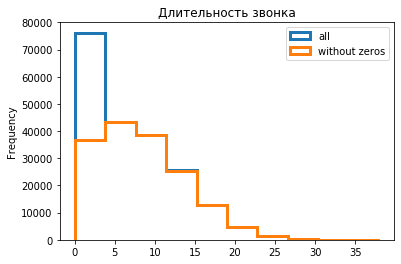

In [34]:
ax = ( 
    calls.plot(y = 'duration', kind = 'hist', histtype = 'step', linewidth = 3, label = 'all')
)

calls.query('duration != 0')\
.plot(y = 'duration', kind = 'hist', histtype = 'step', linewidth = 3,  label = 'without zeros', ax = ax)

plt.title('Длительность звонка')
plt.show()

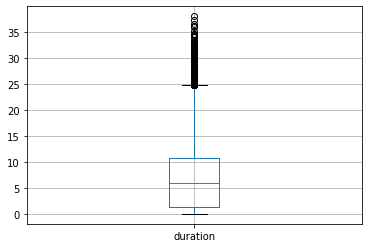

In [35]:
calls.boxplot('duration')

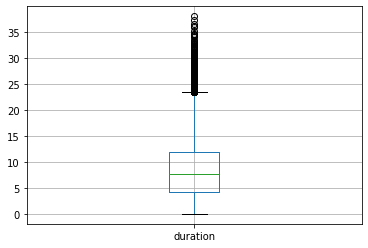

In [36]:
calls.query('duration != 0').boxplot('duration')

Проверим, нет ли в нулевых звонках перекоса в сторону одного из тарифов. Для этого посомтрим соотношение пользователей тарифа к общему количеству пользователей. Сначала по всей выборке, а затем по нулевым звонкам.

In [37]:
#распределение по тарифам по всей выборке
calls.merge(users, how='left', on = 'user_id').groupby('tariff')['user_id'].count() / len(calls)

tariff
smart    0.643191
ultra    0.356809
Name: user_id, dtype: float64

In [38]:
#распределение по тарифам по нулевым звонкам
(
    calls
    .query('duration == 0')
    .merge(users, how='left', on = 'user_id')
    .groupby('tariff')['user_id']
    .count() 
    / 
    len(calls.query('duration == 0'))
)

tariff
smart    0.647994
ultra    0.352006
Name: user_id, dtype: float64

Звонки нулевой длительности составляют 19,55% от общего количества записей. 
При исключении нулевых звонков средняя продолжительность ожидаемо увеличивается, медиана также смещается в сторону большего значения. Граница первого квартиля значительно увеличивается. Зависимоти между тарифом и нулевыми звонками нет. 


Несмотря на то, что нулевые звонки — это почти 1/5 всех данных, в рамках данной аналитической задачи (какой тариф приносит больше денег) мы можем исключить их из рассмотрения. Это возможно, так как для нас важно **не количество** совершенных звонков, а **количество оплаченных звонков**, которые пользователи.  

In [39]:
#создаем новый, хороший датасет с информацией о звонках - без нулевых длительностей
good_calls = calls.query('duration > 0')

## Дополнительные расчеты

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [40]:
f'Количество пользователей до группировки: {users.user_id.nunique()}'

'Количество пользователей до группировки: 500'

In [41]:
#количество сделанных звонков и израсходованных минут разговора по месяцам

users_sub = users.loc[:, ['user_id', 'tariff']] 

#объединяем информацию о пользователях с информацией о звонках
calls_grouped = good_calls.groupby(['user_id', 'month']).agg({'call_id':'count', 'duration':'sum'}).reset_index()
user_x_calls = users_sub.merge(calls_grouped, how = 'left', on = 'user_id',)
user_x_calls.rename(columns={'call_id': 'call_cnt'}, inplace = True)

f'Количество пользователей после группировки: {user_x_calls.user_id.nunique()}'

'Количество пользователей после группировки: 500'

In [42]:
#количество отправленных сообщений по месяцам

#объединяем информацию о пользователях и сообщениях
messages_grouped = messages.groupby(['user_id','month']).agg({'message_id':'count'}).reset_index()
user_x_messages = users_sub.merge(messages_grouped, how = 'left', on = 'user_id')
user_x_messages.rename(columns={'message_id': 'message_cnt'}, inplace = True)

f'Количество пользователей после группировки: {user_x_messages.user_id.nunique()}'

'Количество пользователей после группировки: 500'

In [43]:
#объем израсходованного интернет-трафика по месяцам

#объединяем информацию о пользователях и интернет-траффике
internet_grouped = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
user_x_internet = users_sub.merge(internet_grouped, how = 'left', on = 'user_id')

f'Количество пользователей после группировки: {user_x_internet.user_id.nunique()}'

'Количество пользователей после группировки: 500'

In [44]:
#помесячную выручку с каждого пользователя 

#объединяем таблицы 
user_x_calls_x_msgs = (
    user_x_calls
    .merge(user_x_messages, how = 'outer', on = ['user_id', 'month', 'tariff'])
)

user_x_calls_x_msgs_x_int = (
    user_x_calls_x_msgs
    .merge(user_x_internet, how = 'outer', on = ['user_id', 'month', 'tariff'])
)

#для пользователей, которые не пользловались интернетом, в поле число "испольщованные мегабайты" проставлем нули
user_x_calls_x_msgs_x_int.loc[user_x_calls_x_msgs_x_int['mb_used'].isna(), 'mb_used'] = 0

#для пользователей, которые не отправляли смс, в поле "число собщений" проставлем нули
user_x_calls_x_msgs_x_int.loc[user_x_calls_x_msgs_x_int['message_cnt'].isna(), 'message_cnt'] = 0

#для пользователей, которые не звонили, в поле "длительность звонка" проставлем нули
user_x_calls_x_msgs_x_int.loc[user_x_calls_x_msgs_x_int['duration'].isna(), 'duration'] = 0

#для пользователей, которые не звонили, в поле "количество звонков" проставлем нули
user_x_calls_x_msgs_x_int.loc[user_x_calls_x_msgs_x_int['call_cnt'].isna(), 'call_cnt'] = 0

f'Количество пользователей после группировки: {user_x_calls_x_msgs_x_int.user_id.nunique()}'

'Количество пользователей после группировки: 500'

In [45]:
user_x_calls_x_msgs

,user_id,tariff,month,call_cnt,duration,message_cnt
0,1000,ultra,5.0,17.0,150.06,22.0
1,1000,ultra,6.0,28.0,158.90,60.0
2,1000,ultra,7.0,41.0,318.80,75.0
3,1000,ultra,8.0,42.0,389.87,81.0
4,1000,ultra,9.0,46.0,440.14,57.0
...,...,...,...,...,...,...
3287,1489,smart,9.0,NaN,NaN,32.0
3288,1489,smart,10.0,NaN,NaN,21.0
3289,1489,smart,11.0,NaN,NaN,20.0
3290,1489,smart,12.0,NaN,NaN,35.0


In [46]:
#присоединяем информацию о тарифах
data = user_x_calls_x_msgs_x_int.merge(tariffs, how = 'left', left_on = 'tariff', right_on = 'tariff_name')
data.drop('tariff_name', axis = 1, inplace = True)
data

,user_id,tariff,month,call_cnt,duration,message_cnt,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,5.0,17.0,150.06,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,ultra,6.0,28.0,158.90,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,ultra,7.0,41.0,318.80,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,ultra,8.0,42.0,389.87,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,ultra,9.0,46.0,440.14,57.0,14568.91,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,1489,smart,12.0,0.0,0.00,35.0,17322.51,50,15360,500,550,200,3,3
3291,1494,smart,NaN,0.0,0.00,0.0,0.00,50,15360,500,550,200,3,3
3292,1240,ultra,2.0,0.0,0.00,0.0,959.51,1000,30720,3000,1950,150,1,1
3293,1273,ultra,NaN,0.0,0.00,0.0,0.00,1000,30720,3000,1950,150,1,1


In [47]:
f'Количество пользователей: {data.user_id.nunique()}'

'Количество пользователей: 500'

In [48]:
#вычисляем доход сверх абонентской платы по звонкам
data['extra_minutes'] = data['duration'] - data['minutes_included']
data.loc[data['extra_minutes'] < 0, 'extra_minutes'] = 0
data['call_proceeds'] = round(data['extra_minutes']) * data['rub_per_minute']

#вычисляем доход сверх абонентской платы по сообщениям
data['extra_messages'] = data['message_cnt'] - data['messages_included']
data.loc[data['extra_messages'] < 0, 'extra_messages'] = 0
data['message_proceeds'] = data['extra_messages'] * data['rub_per_message']

#вычисляем доход сверх абонентской платы по мегабайтам
#так как тарификация идет за ГБ, то сначала вычисляем, сколько ГБ израсходовал абонент
#затем округляем в большую сторону 
data['extra_mb'] = data['mb_used'] - data['mb_per_month_included']
data.loc[data['extra_mb'] < 0, 'extra_mb'] = 0
data['mb_proceeds'] = (data['extra_mb']/1024).apply(np.ceil) * data['rub_per_gb']

data['extra_proceeds'] = data['call_proceeds'] + data['message_proceeds'] + data['mb_proceeds']
data['proceeds'] = data['extra_proceeds'] + data['rub_monthly_fee']
data 

,user_id,tariff,month,call_cnt,duration,message_cnt,mb_used,messages_included,mb_per_month_included,minutes_included,...,rub_per_message,rub_per_minute,extra_minutes,call_proceeds,extra_messages,message_proceeds,extra_mb,mb_proceeds,extra_proceeds,proceeds
0,1000,ultra,5.0,17.0,150.06,22.0,2253.49,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
1,1000,ultra,6.0,28.0,158.90,60.0,23233.77,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
2,1000,ultra,7.0,41.0,318.80,75.0,14003.64,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
3,1000,ultra,8.0,42.0,389.87,81.0,14055.93,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
4,1000,ultra,9.0,46.0,440.14,57.0,14568.91,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,1489,smart,12.0,0.0,0.00,35.0,17322.51,50,15360,500,...,3,3,0.0,0.0,0.0,0.0,1962.51,400.0,400.0,950.0
3291,1494,smart,NaN,0.0,0.00,0.0,0.00,50,15360,500,...,3,3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,550.0
3292,1240,ultra,2.0,0.0,0.00,0.0,959.51,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0
3293,1273,ultra,NaN,0.0,0.00,0.0,0.00,1000,30720,3000,...,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1950.0


## Выводы

Подготовили данные для дальнейшей работы. 

# Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 

Посмотрим распределение выручки по тарифам. При этом рассмотрим как весь объем, так и только дополнительные продажи отдельно.

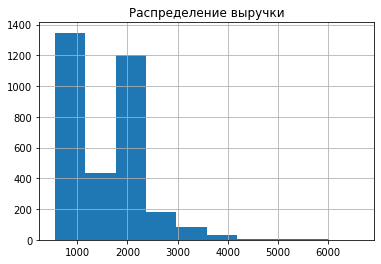

In [49]:
data['proceeds'].hist(bins = 10)
plt.title('Распределение выручки')
plt.show()

На гистограмме явно просматривается 2 распределения. Пики приходятся на бины, в которые попадает абонентская плата. Рассмотрим каждый тариф отдельно.

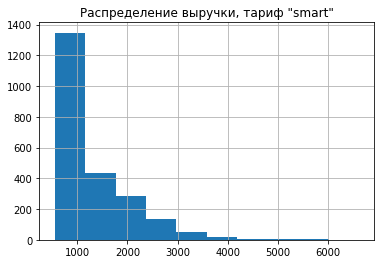

In [50]:
data.query('tariff == "smart"')['proceeds'].hist(bins = 10)
plt.title('Распределение выручки, тариф "smart"')
plt.show()

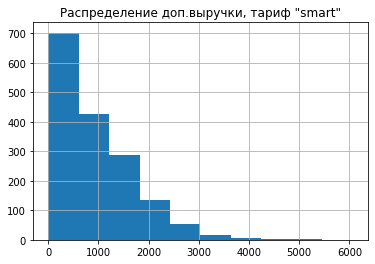

In [51]:
data.query('tariff == "smart" and extra_proceeds > 0')['extra_proceeds'].hist(bins = 10)
plt.title('Распределение доп.выручки, тариф "smart"')
plt.show()

In [52]:
#рассчитаем процент пользователей смарт, которые покупают доп опции
(
    data
    .query('tariff == "smart" and extra_proceeds > 0')['user_id'].count() 
    / 
    data
    .query('tariff == "smart"')['user_id'].count() 
)

0.7152259763053971

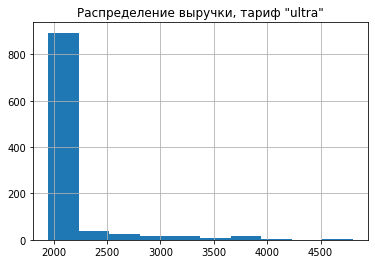

In [53]:
data.query('tariff == "ultra"')['proceeds'].hist(bins = 10)
plt.title('Распределение выручки, тариф "ultra"')
plt.show()

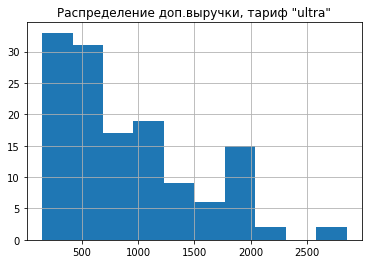

In [54]:
data.query('tariff == "ultra" and extra_proceeds > 0')['extra_proceeds'].hist(bins = 10)
plt.title('Распределение доп.выручки, тариф "ultra"')
plt.show()

In [55]:
#рассчитаем процент пользователей ультра, которые покупают доп опции
(
    data
    .query('tariff == "ultra" and extra_proceeds > 0')['user_id'].count() 
    / 
    data
    .query('tariff == "ultra"')['user_id'].count() 
)

0.13188976377952755

Посмотрим описание выручки и доп.выручки по каждому тарифу

In [56]:
data.query('tariff == "smart"')['proceeds'].describe().to_frame()

,proceeds
count,2279.000000
mean,1241.648530
std,798.634794
min,550.000000
25%,550.000000
50%,950.000000
75%,1685.000000
max,6614.000000


In [57]:
data.query('tariff == "ultra"')['proceeds'].describe().to_frame()

,proceeds
count,1016.000000
mean,2066.486220
std,370.974427
min,1950.000000
25%,1950.000000
50%,1950.000000
75%,1950.000000
max,4800.000000


In [58]:
data.query('tariff == "smart" and extra_proceeds > 0')['extra_proceeds'].describe().to_frame()

,extra_proceeds
count,1630.000000
mean,967.034969
std,790.856972
min,3.000000
25%,400.000000
50%,800.000000
75%,1400.000000
max,6064.000000


In [59]:
data.query('tariff == "ultra" and extra_proceeds > 0')['extra_proceeds'].describe().to_frame()

,extra_proceeds
count,134.000000
mean,883.208955
std,606.634498
min,150.000000
25%,450.000000
50%,750.000000
75%,1312.500000
max,2850.000000


Мы рассмотрели доход от дополнительных продаж. Средняя выручка по тарифу "смарт" меньше, чем по тарифу "ультра". При этом пользователи "смарт" чаще, чем пользователи "ультра" превышают установленные лимиты: 73% смарт пользователей против 13% у ультры. Но в целом один пользователь ультры приносит больше, чем один смарт, при этом доп.выручки по тарифам примерно одинакова.

In [60]:
def plot_hist (parameter, threshold):
    for tariff_name in data['tariff'].unique():
        ax = plt.subplot(111)
        (
            data
            .query('tariff == @tariff_name')[parameter]
            .plot(
                y = parameter, 
                kind = 'hist', 
                histtype = 'step', 
                linewidth = 3, 
                label = tariff_name,
                alpha = 0.7,
                ax = ax
            )
        )
        plt.axvline(
            x = data.query('tariff == @tariff_name')[threshold].max(), 
            color = (random.random(), random.random(), random.random()),
            linestyle = ':', 
            label = tariff_name + ' treshold'
        )
        plt.show
    plt.title(parameter)
    plt.legend(loc = 'upper right')    


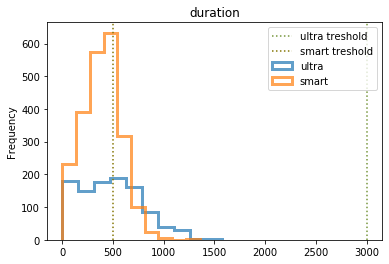

In [61]:
plot_hist('duration', 'minutes_included')

In [66]:
print('75% персентиль, тариф смарт - длительность звонка: {} секунд'
 .format(data.query('tariff == "smart"')['duration'].describe()['75%'])
     )

75% персентиль, тариф смарт - длительность звонка: 512.3500000000001 секунд


In [69]:
print('72 квантиль, тариф смарт - длительность звонка: {} секунд'
      .format(data.query('tariff == "smart"')['duration'].quantile(0.72))
     )

72 квантиль, тариф смарт - длительность звонка: 497.508 секунд


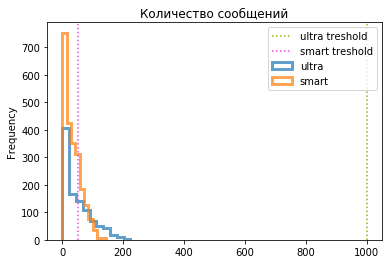

In [75]:
plot_hist('message_cnt', 'messages_included')
plt.title('Количество сообщений')
plt.show()

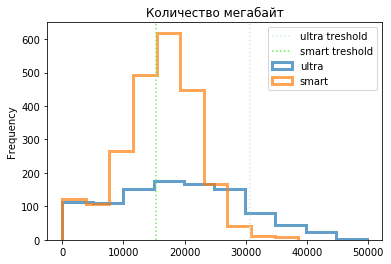

In [76]:
plot_hist('mb_used', 'mb_per_month_included')
plt.title('Количество мегабайт')
plt.show()

In [72]:
report = data.pivot_table(index = ['user_id', 'month'],
                         values = ['duration', 'message_cnt', 'mb_used'],
                             columns = ['tariff'])
report = report.describe().swaplevel(0, 1, axis = 1).sort_index(axis = 1)
report.loc[['mean','std']].T

mean           std
tariff                                        
smart  duration       394.427026    179.962207
       mb_used      16208.386990   5870.476681
       message_cnt     33.384029     28.227876
ultra  duration       497.068223    299.904152
       mb_used      19468.805208  10087.170752
       message_cnt     49.363452     47.804457

In [73]:
report = data.pivot_table(index = ['user_id', 'month'],
                         values = ['duration', 'message_cnt', 'mb_used'],
                             columns = ['tariff'])
report = report.swaplevel(0, 1, axis = 1).sort_index(axis = 1)
report.var().to_frame().style.format('{:.2f}')

## Вывод

Мы знаем, что распределение между тарифами примерно следующее: 65% смарт и 35% ультра. Поэтому внешний вид гистограмм не смущает: одна выше, другая ниже. При этом характер и их положение на графике очень схожи. 
Средние значения по всем показателям для тарифа "ультра" выше, но при этом не настолько, насколько можно было ожидать, зная различия в цене и услугах тарифов.  
При этом для обоих тарифов показатели рассеяния - отклонение от среднего и дисперсия - большое по всем параметрам. Это значит, что данные не сконцентрированы вокург среднего, а достаточно сильно вариативны. 

### Минуты
Например диапазон для тарифа "смарт", в который попадет 95% всех наблюдений по длительности звонков: от 0 до 932 минуты (среднее +/- 3 стандартных отклонения). Разброс точно не маленький. Значит, далеко не все укладываются в ограничение тарифа по минутам. Этот же вывод можно сделать по гистограмме: 28% пользователей используют минуты сверх тарифа.

Для тарифа "ультра" диапазон, в который попадет 95% всех наблюдений: от 0 до 1381 минуты. Разброс также большой, но при этом даже его верхняя граница не достигает ограничения по тарифу. По крайней мере пользователи из этой выборки не оплачивали дополнительные минуты в течение года.

### Сообщения
Длительность звонков распределена нормально, а вот распределение количества сообщений похоже на Пуассона. Чаще люди отпралвяют небольшое число сообщений и редко отправляют много сообщений в месяц. Наверняка все общение происходит через мессенджеры :)
При этом снова пользователи "смарт" выходят за границы дозволенного, а "ультры" — никак не могут потратить все, что имеют.

### Интернет
Интернетом пользуются +/- одинаково, и "смарт" и "ультра" потребляют дополнительные гигабайты. Интернеты всегда мало, это же не смс-ки. 

### Итог

По данным выборки получается, что поведение пользователей двух разных тарифов не сильно-то и отличается. Если бы мы не делили их по тарифам заранее, то возможно и отличить бы не сомгли, не смогли бы разделить их на два сегмента. 
 

# Проверка гипотез

1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;



## Первая гипотеза

Необходимо сравнить средние двух генеральных совокупностей по взятым из них выборкам. В этом случае гипотезы звучат так: 
- H0: средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" равны. 
- H1: средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" не равны. 

Посмотрим, чему равно среднее по выборке:

In [ ]:
data.groupby('tariff')['proceeds'].mean().to_frame()

По выборке наблюдается значительное различие между средними значениями — почти в 2 раза. Необходимо понять, случайное это расхождение или нет. При проведение t-теста мы можем считать, что дисперсии выборок равны, так как они пришли из одного источника.

In [ ]:
sample_1 = data.query('tariff == "smart"')['proceeds']
sample_2 = data.query('tariff == "ultra"')['proceeds']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

##  Вывод по первой гипотезе
По итогу теста нулевую гипотезу отвергаем, так как вероятность случайности в разнице значений средних очень мала (p-value сильно меньше 5%). То есть очень мала вероятность того, что к нам попали нерепрезентативными данные, которые искажают реальную картину. Видимо, реальная картина такая: нельзя сказать, что средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" равны.

## Вторая гипотеза 
Необходимо сравнить средние двух генеральных совокупностей по взятым из них выборкам. В этом случае гипотезы звучат так: 
- H0: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны. 
- H1: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не равны. 

Посмотрим, чему равно среднее по выборке:


In [ ]:
#добавляем в рабочий датафрейм информацию о городе
data_x_city = data.merge(users, how = 'left', on = ['user_id', 'tariff'])

#определяем выборки
data_moscow = data_x_city.query('city == "МОСКВА"')['proceeds']
data_reg = data_x_city.query('city != "МОСКВА"')['proceeds']

#Находим среднее
print('Средняя выручка по Москве: ', data_moscow.mean())
print('Средняя выручка по регионам: ', data_reg.mean())

Средние значения очень близки друг к другу. Необходимо выяснить: всегда ли это верно.

In [ ]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_moscow, 
    data_reg)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

##  Вывод по второй гипотезе
По итогу теста нулевую гипотезу не получилось отвергнуть, так как вероятность случайности в разнице значений велика (p-value сильно больше 5%). То есть очень велика вероятность того, что разница между средними обусловлена случайностью. Видимо, реальная картина такая: нельзя отвергать возможность того, что средняя выручка пользователей Москвы и средняя выручка пользователей из регионов равны.

# Общий вывод
**Какой тариф приносит больше денег** 
Тариф "Ультра" приносит больше денег в пересчете на одного человека. Средняя выручка по этому тарифу почти в 2 раза больше, чем средняя выручка по тарифу "Смарт". При этом выдающейся разницы между выручкой от доп.продаж по тарифам нет. В среднем пользователи ведут себя одинаково на обоих тарифах. 